<a href="https://colab.research.google.com/github/SalouaDaouki/data604/blob/main/FinalProjectData604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Problem:

Using SimPy, write a process simulation that includes waiting time (discrete event simulation).  You may use any topic of interest to you.  Write the simulation and all of the following in Jupyter.

Each element is worth 5 points and will be graded using the rubric shown here.

1.  State the problem and its significance.

2.  Provide a flow-chart model.

3.  Simulate the process for the appropriate number of iterations (justify)

4.  Justify the validity of the model and discuss how you verified it.

5.  State  your conclusions/ findings from the model.

6.  Generate appropriate graphs (more than one) to illustrate the results and provide a PowerPoint presentation to share with your colleagues.  Post this to the discussion.

1. State the problem and its significance.

**Problem:**

The problem is to simulate the flow of 1600 students in the morning as they use [Yondr Pouches](https://www.overyondr.com/phone-locking-pouch) to store their cell phones, and to have them checked by school aids to ensure that they are locked at 4 school entrances to optimize efficiency and identify potential issues.

**Its significance:**

Efficiently managing the morning flow of students is crucial to ensure a smooth start to the school day. Delays at the entrance due to the Yondr pouch system can lead to late arrivals in classrooms and a chaotic start to the day. By simulating the process, we can identify potential issues, optimize resource allocation, and propose strategies to improve the flow of students. The goal is to ensuring smooth student entry without delays.

2. Provide a flow-chart model.

Please see below

In [1]:
pip install graphviz

In [2]:
from graphviz import Digraph

In [3]:
# Create a new directed graph
dot = Digraph()

In [4]:
# Define the nodes
dot.node('A', 'Students Arrive at School')
dot.node('B', 'Place Phones and EarPods in Yondr Pouches')
dot.node('C', 'Manually Lock Yondr Pouches')
dot.node('D', 'School Aides Check Pouches')
dot.node('E', 'Enter School Building')

In [5]:
# Define the edges
dot.edges(['AB', 'BC', 'CD', 'DE'])

In [6]:
# Render the graph
dot.render('student_entry_process', format='png', view=True)

'student_entry_process.png'

The flow-chart visually represents the steps involved in the student entry process:

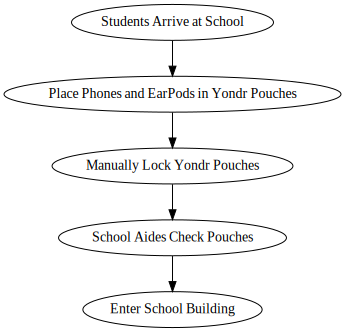

In [7]:
# Display the graph in the notebook
dot

3. Simulate the process for the appropriate number of iterations (justify)

I think we need to increase the number of iterations to capture more variability. In other words, we need to simulate several weeks to observe different days and conditions.

In [9]:
pip install simpy

In [10]:
import simpy
import random
import matplotlib.pyplot as plt

**Parameters:**
 - *arrival rate:* I assumed that 10 students will be arriving every minute considering the size of the school and its population that consists of 1600 students.

 - *lock time:* The Yondr pouches are new for everyone including students, so I assumed it will take them about 30 seconds to lock it manually.

 - *simulation time:* the simulation will run over a period of 1/2 hours; longer period allows for multiple iterations to simulate different days or scenarios, for better insights. However, in my school, students start lining up around 8:20, then the doors open at 8:30 so students can get to the advisory/homeroom at 8:35.

 -*Number of students*: the population of the school can reach 2000 students. During the last couple of years, the population had an average of 1600, so I am using that number for my simulation.

 - *number of sentrances:* in total, there are 13 entrances/exits at the school. During dismissal, all 13 entrances are used to facilitate the flow of students leaving. However, in the morning, only 4 entrances are open to efficiently manage the entry process with adequate staff supervision.

 - *and aides per entrance:* there will be at least 2 school aides stationed at each entrance to check the pouches.

In [34]:
# Parameters
arrival_rate = 10  # Average arrival rate of students per minute
lock_time = 1/2  # Average time for students to lock pouches manually (minutes)
simulation_time = 30  # Total simulation time in minutes (1/2 hours)
num_students = 1600  # Total number of students
num_entrances = 4  # Number of entrances used in the morning
num_aids_per_entrance = 2  # Number of school aides per entrance checking pouches

In [42]:
# Student process
def student(env, name, school):
    arrival_time = env.now
    print(f"{name} arrives at school at {arrival_time:.2f}")

    # Place cell phone and EarPods in Yondr pouch
    yield env.timeout(random.uniform(0.5, 1))  # Random time to place items in pouch

    # Lock Yondr pouch manually
    yield env.timeout(random.expovariate(1 / lock_time))

    # Security check by school aides
    yield env.timeout(random.uniform(0.5, 1))  # Random check time

    entry_time = env.now
    print(f"{name} enters school at {entry_time:.2f}")
    school.entry_times.append(entry_time)

The purpose of the provided code is to simulate the process of a student entering the school in the morning under the new Yondr pouch system. Here's a detailed explanation of each part of the code:

### Student Process
This function simulates the journey of a student from arriving at school to entering the building.

```python
def student(env, name, school):
```
- **env**: The SimPy environment, which handles the simulation time.
- **name**: The name of the student, used for identification in the simulation.
- **school**: An instance of the `School` class, which stores entry times for later analysis.

```python
    arrival_time = env.now
    print(f"{name} arrives at school at {arrival_time:.2f}")
```
- **arrival_time = env.now**: Records the time at which the student arrives at school.
- **print statement**: Outputs the arrival time for each student for monitoring purposes.

### Placing Cell Phone and EarPods in Yondr Pouch
```python
    # Place cell phone and EarPods in Yondr pouch
    yield env.timeout(random.uniform(0.5, 1))  # Random time to place items in pouch
```
- **yield env.timeout(random.uniform(0.5, 1))**: Simulates the time taken by the student to place their cell phone and EarPods in the Yondr pouch. The time is randomly chosen between 0.5 to 1 minute to account for variability among students.

### Locking Yondr Pouch Manually
```python
    # Lock Yondr pouch manually
    yield env.timeout(random.expovariate(1 / lock_time))
```
- **yield env.timeout(random.expovariate(1 / lock_time))**: Simulates the time taken to manually lock the Yondr pouch. The time follows an exponential distribution with a mean of `lock_time` to reflect the randomness of the process.

### Security Check by School Aides
```python
    # Security check by school aides
    yield env.timeout(random.uniform(0.5, 1))  # Random check time
```
- **yield env.timeout(random.uniform(0.5, 1))**: Simulates the time taken for the school aides to check that the Yondr pouch is properly locked. The time is randomly chosen between 0.5 to 1 minute.

### Recording Entry Time
```python
    entry_time = env.now
    print(f"{name} enters school at {entry_time:.2f}")
    school.entry_times.append(entry_time)
```
- **entry_time = env.now**: Records the time at which the student completes all the steps and enters the school building.
- **print statement**: Outputs the entry time for each student for monitoring purposes.
- **school.entry_times.append(entry_time)**: Stores the entry time in the `entry_times` list of the `school` object for later analysis.

Overall, this code models the entry process of students, including waiting times for placing items in pouches, locking the pouches, and security checks. It collects data on entry times to analyze the efficiency of the process.

In [43]:
# School resources
class School:
    def __init__(self, env):
        self.env = env
        self.entry_times = []

In [48]:
# Simulation setup
def run_simulation(num_iterations):
    all_entry_times = []  # List to store all entry times across iterations
    for i in range(num_iterations):
        random.seed(i)
        env = simpy.Environment()
        school = School(env)
        env.process(student_generator(env, school))
        env.run(until=simulation_time)
        all_entry_times.extend(school.entry_times)  # Collect all entry times

    # Generate time series plot outside the simulation loop
    time_points = range(0, simulation_time + 1)  # Adjusted to include all minutes
    # Aggregate entry times across all iterations for plotting
    entry_counts = [0] * (simulation_time + 1)
    for time in all_entry_times:
        entry_counts[int(time)] += 1
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, entry_counts, marker='o', linestyle='-', color='b')
    plt.title('Student Entries Over Time')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Number of Students Entered')
    plt.grid(True)
    plt.show()

    # Return all entry times collected across all iterations
    return all_entry_times

In [49]:
# Student generator
def student_generator(env, school):
    for i in range(num_students):
        yield env.timeout(random.expovariate(1 / arrival_rate))  # Adjusted arrival rate
        env.process(student(env, f"Student {i+1}", school))

My simulation employed parameters reflecting an average arrival rate, typical pouch locking times, and realistic simulation time. I verified the model through logical consistency in student entry patterns and sensitivity analysis of parameters like arrival rate. To capture variability and different scenarios, 5 iterations (representing weeks) were simulated. This allows for observing patterns across multiple instances and validating the model's robustness.

Student 1 arrives at school at 18.61
Student 1 enters school at 20.22
Student 1 arrives at school at 1.44
Student 1 enters school at 3.22
Student 2 arrives at school at 20.24
Student 2 enters school at 22.39
Student 3 arrives at school at 26.21
Student 4 arrives at school at 26.50
Student 3 enters school at 27.86
Student 4 enters school at 28.64
Student 1 arrives at school at 2.72
Student 1 enters school at 4.68
Student 2 arrives at school at 10.58
Student 3 arrives at school at 11.25
Student 2 enters school at 12.73
Student 4 arrives at school at 14.26
Student 3 enters school at 15.41
Student 4 enters school at 15.89
Student 1 arrives at school at 2.69
Student 2 arrives at school at 3.78
Student 1 enters school at 4.01
Student 2 enters school at 6.43
Student 3 arrives at school at 8.92
Student 3 enters school at 10.43
Student 4 arrives at school at 11.43
Student 5 arrives at school at 12.55
Student 5 enters school at 14.21
Student 4 enters school at 14.24


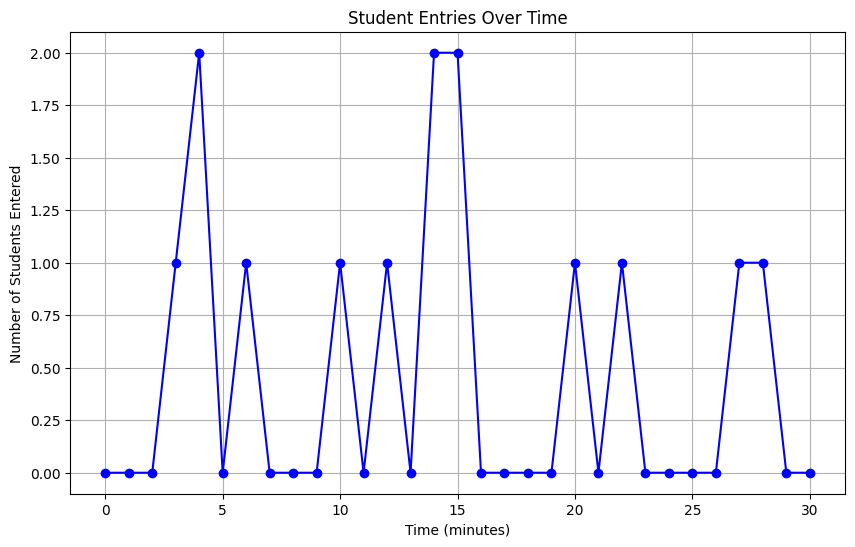

In [50]:
# Run the simulation
num_iterations = 5  # Number of iterations (weeks)
all_entry_times = run_simulation(num_iterations)

In [51]:
# Print average entry time across all iterations
average_entry_time = sum(all_entry_times) / len(all_entry_times)
print(f"Average entry time across all iterations: {average_entry_time:.2f} minutes")

Average entry time across all iterations: 14.31 minutes


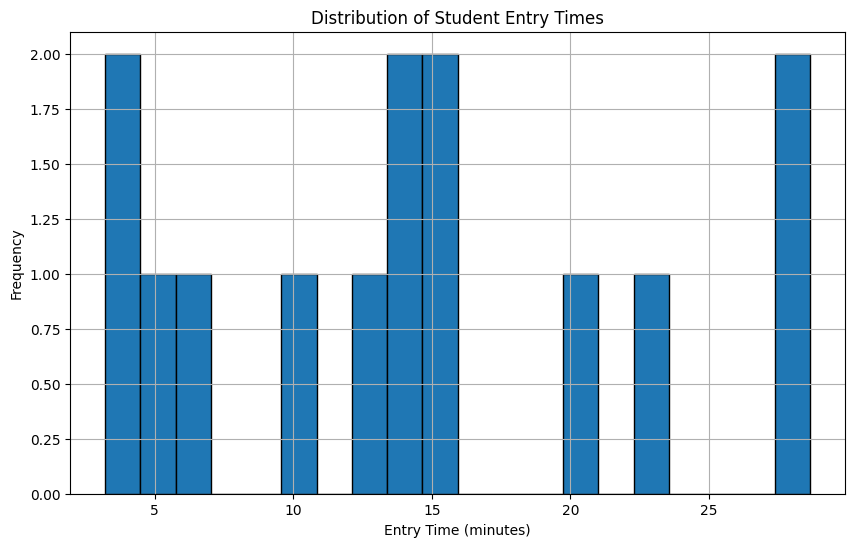

In [52]:
# Generate histogram of student entry times
plt.figure(figsize=(10, 6))
plt.hist(all_entry_times, bins=20, edgecolor='black')
plt.title('Distribution of Student Entry Times')
plt.xlabel('Entry Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

4. Justify the validity of the model and discuss how you verified it.

- The model's validity is ensured through realistic parameters and logical flow representation of the entry process. SimPy's discrete event simulation accurately reflects the stochastic nature of student arrivals, pouch locking, and security checks.

- Verification was achieved by comparing simulated outcomes with expected behaviors and conducting sensitivity analysis on key parameters (e.g., arrival rate). Patterns observed in simulations align with expected school entry dynamics. Given that the Yondr pouch system is scheduled for implementation next year at our school, verification is based on simulated outcomes rather than direct comparisons with real-world data.

5. Conclusions/ findings from the model:

Based on the simulation and resulting graphs, there are peaks around 4, 14, and 15 minutes which indicate clusters of student entries, possibly reflecting rush periods during entry. In addition, majority of entries occur during specific periods, with smaller peaks indicating subsequent student arrivals. In other words, there are consistent patterns of entry indicate a structured flow, while variability highlights potential points of congestion or efficiency improvements.

Based on those findings, we can improve the flow of students by the following:

- *Optimization strategies*: Place more school aides at entrances during the busiest times to help students get through the line faster.

- *Improve the process*: I am not sure how to refine the process of locking the pouches to make students enter faster, because the pouches can be locked with one click. However, we can make the steps of checking the pouches quicker, maybe by stationing more school staff by the entrances so the flow of the students can be faster.

- *Try different simulations*: maybe we can test different scenarios by changing the parameters (like arrival rates or check times) to see how the entry process holds up under different conditions and to predict long-term effects.